# Titanic
<img src ="https://upload.wikimedia.org/wikipedia/commons/f/fd/RMS_Titanic_3.jpg" width = 500px /> <br>

RMS Titanic, White Star Line şirketine ait Olympic sınıfı bir transatlantik yolcu gemisiydi. Harland and Wolff (Belfast, İrlanda) tersanelerinde üretilmiştir. 15 Nisan 1912 gecesi daha ilk seferinde bir buz dağına çarpmış ve yaklaşık iki saat kırk dakika içinde Kuzey Atlantik'in buzlu sularına gömülmüştür. 1912'de yapımı tamamlandığında dünyanın en büyük buharlı yolcu gemisiydi. Batışı 1.514 kişinin ölümüyle sonuçlanmış ve en büyük deniz felaketlerinden biri olarak tarihe geçmiştir.

# Understand the objective
**'Ne tür insanların (isim, yaş, cinsiyet, sosyo-ekonomik sınıf, vb.) hayatta kalma olasılığı daha yüksekti?'.**
* **Amaç:** Bir yolcunun Titanik'in batmasından sağ çıkıp çıkmadığını tahmin etmek. (0 ya da 1)
* **Metrik:** Accuracy

### Data Dictionary
| Değişken | Açıklama | Not |
| :- | :- | :- |
| PassengerId | Yolcu id'si 
| Survived | Hayatta Kalma | 0 = Hayır, 1 = Evet
| Pclass | Bilet sınıfı | 1st = Upper, 2nd = Middle, 3rd = Lower
| Name | Yolcunun adı
| Sex | Yolcunun yaşı | Yaşı 1'den küçükse kesirli
| SibSp | Gemideki kardeş/eş sayısı | Sibling - Spouse
| Parch | Gemideki ebeveyn/çocuk sayısı | Parent - Child
| Ticket | Bilet numarası
| Fare | Yolcu ücreti |
| Cabin | Kabin numarası
| Embarked | Gemiye binildiği liman | C = Cherbourg, Q = Queenstown, S = Southampton

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import scale
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Importing the data

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Clean the data

### PassengerId
* Modele ve veri keşfine etki etmeyeceği için veri setinden atılabilir.

In [6]:
display(train_df.PassengerId.head().to_frame())

train_df.drop("PassengerId", axis = 1, inplace = True)

,PassengerId
0,1
1,2
2,3
3,4
4,5


### Survived
* Hedef değişkenimizin veri türünü değiştirmeye gerek yok.

In [7]:
train_df.Survived.value_counts().to_frame()

,Survived
0,549
1,342


### Pclass
* Doğru bir şekilde keşfedilmesi için kategorik değişkene dönüştürülmesi gerekiyor.

In [8]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
test_df["Pclass"] = test_df["Pclass"].astype("category")

train_df.Pclass.value_counts().sort_index().to_frame()

,Pclass
1,216
2,184
3,491


### Name -> Title
* İsimlerdeki ünvanlar çıkarılıp yeni bir kategorik sütun oluşturulacak ve bu sütun atılacak.
* Ünvanlar yaş değerlerini ve dolayısıyla hayatta kalıp kalmamayı dolaylı yoldan etkileyebilir.

In [9]:
display(train_df.Name.head().to_frame())

def getTitle(string):
    title = string.replace(".", ",").split(",")[1].strip()
    noblewoman = ["Ms", "Mlle", "the Countess", "Mme", "Lady", "Dona"]
    gentleman = ["Dr", "Rev", "Col", "Major", "Jonkheer", "Don", "Capt", "Sir"]
    if title in noblewoman:
        title = "Noblewoman"
    elif title in gentleman:
        title = "Gentleman"
    return title

def trainTest(df):
    df["Title"] = df.Name.apply(getTitle)
    df["Title"] = df["Title"].astype("category")
    df.drop("Name", axis = 1, inplace = True)

trainTest(train_df)
trainTest(test_df)

train_df.Title.value_counts().to_frame()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


,Title
Mr,517
Miss,182
Mrs,125
Master,40
Gentleman,21
Noblewoman,6


### Sex
* Kategorik değişkene dönüştürülecek.

In [10]:
train_df["Sex"] = train_df["Sex"].astype("category")
test_df["Sex"] = test_df["Sex"].astype("category")

train_df.Sex.value_counts().to_frame()

,Sex
male,577
female,314


### Ticket
* Ticket featureı aslında aileleri ve yalnız seyahat eden yolcuları ortaya çıkarıyor.
* Bu veriler **Parch** ve **SibSp** sütunları ile de elde edilebileceği için bu sütun atılacak.

In [11]:
display(train_df.Ticket.head().to_frame())

train_df.drop("Ticket", axis = 1, inplace = True)
test_df.drop("Ticket", axis = 1, inplace = True)

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450


### SibSp + Parch > isAlone
* **SibSp** ve **Parch** sütunlarının veri türleri doğru bir şekilde ayarlanmış.
* Bu iki değişkenin aynı satırda değerleri toplandığında elde edilen **0** değeri, bize yolcunun yalnız olduğunu söyler.

In [12]:
train_df["isAlone"] = [True if e == 0 else False for e in (train_df.SibSp + train_df.Parch)]
test_df["isAlone"] = [True if e == 0 else False for e in (test_df.SibSp + test_df.Parch)]

train_df.isAlone.value_counts().to_frame()

,isAlone
True,537
False,354


## Completeness

In [13]:
train_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
Title         0
isAlone       0
dtype: int64

* <code>train_df</code>'de 3 adet featureda eksik değer bulunuyor: **Age**, **Cabin**, **Embarked** 

In [14]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
Title            0
isAlone          0
dtype: int64

* <code>test_df</code>'de 3 adet featureda eksik değer bulunuyor: **Age**, **Fare**, **Cabin** 
* Eksik olan ortak sütunlar beraber işlem görecek. Ortak olmayan sütunlar ayrı ayrı işlem görecek.

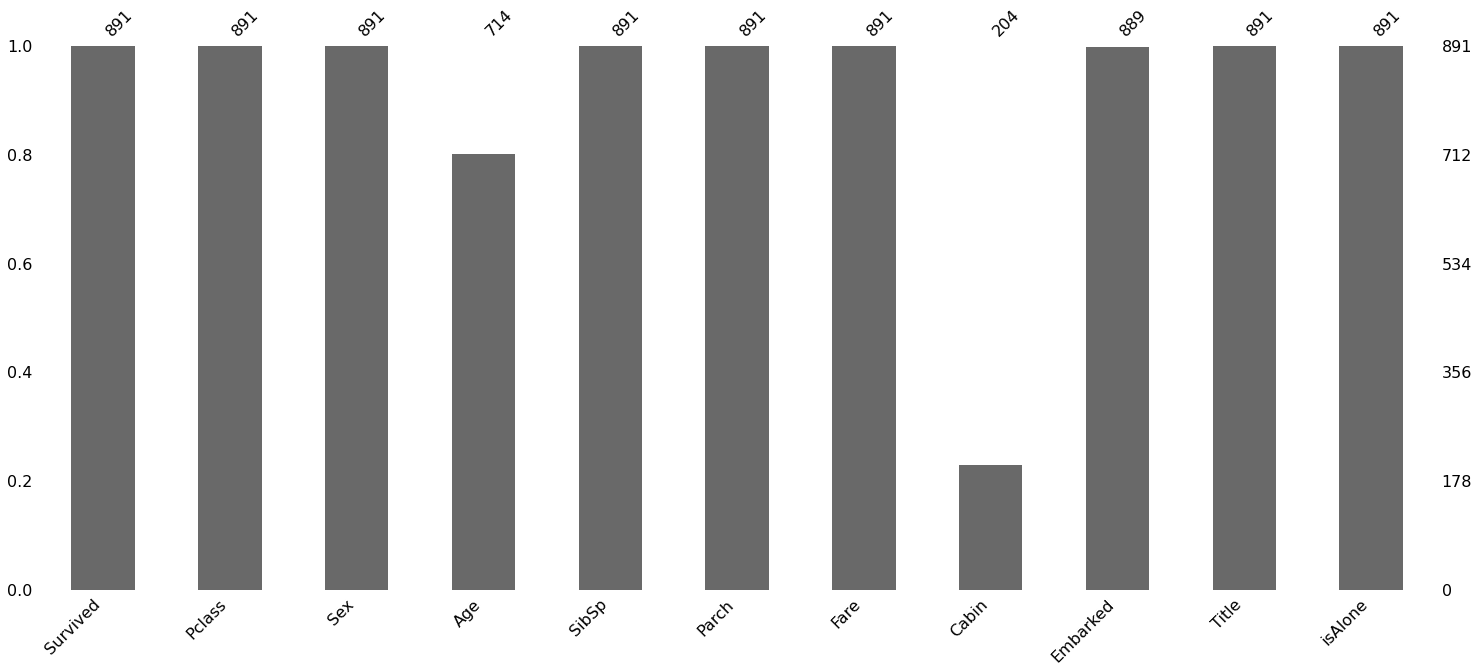

In [15]:
msno.bar(train_df)
plt.show()

* **Age** sütununun yaklaşık olarak %20'si eksik.
* **Cabin** sütununun yaklaşık olarak %80'i eksik.
* **Embarked** sütununda yalnızca 2 adet gözlemin verisi eksik.

### Age
* Nümerik feature.
* Feature veri setinden atılamaz çok bilgi içeriyor. Samplelar atılamaz veri setinin kayda değer bir kısmını kapsıyor.
* Veriler uygun değerlerle doldurulabilir.
* **Pclass**, **Sex**, **Fare**, **Embarked**, **Title**, **isAlone** sütunlarına göre **Age** sütunu değişkenlik gösteriyor olabilir.
* Bu yüzden Age sütundaki eksik değerleri *regression* ile tahmin edeceğim.

In [16]:
cols = ["Pclass", "Sex", "Fare", "Embarked", "Title", "isAlone", "Age"]
def missAge(df):
    forAge = df[cols]
    forAge = pd.get_dummies(forAge, drop_first = True)
    impute_it = IterativeImputer()
    df["Age"] = impute_it.fit_transform(forAge)[:, 2]

missAge(train_df)
missAge(test_df)

### Cabin
* Veriyi kaybetmek istemiyorum o yüzden eksik olan değerlere *Missing*, eksik olmayan değerlere de *Not Missing* diyeceğim.

In [17]:
def missCabin(df):
    df["Cabin"] = ["Missing" if e!=e else "Not Missing" for e in df.Cabin]
    df["Cabin"] = df["Cabin"].astype("category")
    
missCabin(train_df)
missCabin(test_df)

train_df.Cabin.value_counts().to_frame()

,Cabin
Missing,687
Not Missing,204


### Embarked
* <code>train_df</code>'de **Embarked** sütununda eksik değerler var.

In [18]:
train_df[train_df.Embarked.isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,isAlone
61,1,1,female,38.0,0,0,80.0,Not Missing,NaN,Miss,True
829,1,1,female,62.0,0,0,80.0,Not Missing,NaN,Mrs,True


* Cinsiyeti kadın ve yolcu sınıfı first class olan kişilerin bindiği limanlara bakalım.

In [19]:
pd.crosstab(train_df.Embarked, [train_df.Pclass, train_df.Sex]) # Pclass = 1, Sex = "female"

Pclass        1           2           3     
Sex      female male female male female male
Embarked                                    
C            43   42      7   10     23   43
Q             1    1      2    1     33   39
S            48   79     67   97     88  265

* Kriterlere uyan kadınlardan 43 tanesi C limanından, 1 tanesi Q limanından, 48 tanesi de S limanından binmiş.

In [20]:
train_df.Embarked.value_counts().to_frame()

,Embarked
S,644
C,168
Q,77


* Bu noktada C, oransal olarak S'den daha yüksektir. Bu yüzden limanı C olarak dolduracağım.

In [21]:
train_df['Embarked'] = train_df['Embarked'].fillna("C")
train_df["Embarked"] = train_df["Embarked"].astype("category")
test_df["Embarked"] = test_df["Embarked"].astype("category")

### Fare
* <code>test_df</code>'de **Fare** sütununda eksik değer var.

In [22]:
test_df[test_df.Fare.isna()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,isAlone
152,1044,3,male,60.5,0,0,NaN,Missing,S,Mr,True



* Kişinin yalnız olup olmadığına ve seyahat ettiği sınıfa bakılarak bu ücret tahmini olarak yazılabilir.

In [23]:
fareMedian = test_df.query("Pclass == 3 & isAlone == True")["Fare"].median()
test_df.fillna({"Fare": fareMedian}, inplace = True)

### FamSize
* **SibSp** ile **Parch** toplamın yolcu (**1**) eklenerek kişinin aile büyüklüğü bulunabilir.

In [24]:
train_df["FamSize"] = train_df["SibSp"] + train_df["Parch"] + 1
test_df["FamSize"] = test_df["SibSp"] + test_df["Parch"] + 1

# Explore the data

In [25]:
train_df.iloc[:, 1:].describe()

,Age,SibSp,Parch,Fare,FamSize
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.780307,0.523008,0.381594,32.204208,1.904602
std,13.574050,1.102743,0.806057,49.693429,1.613459
min,0.420000,0.000000,0.000000,0.000000,1.000000
25%,21.000000,0.000000,0.000000,7.910400,1.000000
50%,29.000000,0.000000,0.000000,14.454200,1.000000
75%,36.750000,1.000000,0.000000,31.000000,2.000000
max,80.000000,8.000000,6.000000,512.329200,11.000000


* Gemideki yaş ortalaması yaklaşık **30**, en küçük yolcu yaklaşık **5 aylık** bir bebek, en yaşlı kişi ise **80** yaşında.
* En fazla **11** üyeye sahip bir aile varken kişiler çoğunlukla **yalnız** seyahat etmeyi tercih etmiş.

In [26]:
train_df.describe(include = ["category", "bool"])

,Pclass,Sex,Cabin,Embarked,Title,isAlone
count,891,891,891,891,891,891
unique,3,2,2,3,6,2
top,3,male,Missing,S,Mr,True
freq,491,577,687,644,517,537


* Gemide **erkek** ve **yalnız** insan nüfusu daha fazla.
* Yolcular çoğunluk olarak **3. sınıf**ta yolculuk ediyor ve en çok **S** limanından yolcu bulunuyor.
* Gemide seyahat eden yolcuların çoğunluğunun seyahat ettiği kabin bilinmiyor.

## Survived

In [27]:
def drawCountPlot(col):
    display(train_df.groupby([col])["Survived"].value_counts(normalize = True).sort_index().to_frame())
    g = sns.countplot(x = col, data = train_df, hue = "Survived", palette = {0 : "red", 1: "green"})
    g.set_title("Survived - "+col)

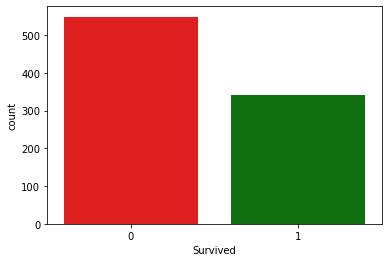

In [28]:
sns.countplot(x = "Survived", data = train_df, palette = {0 : "red", 1: "green"})
plt.show()

* Kazada 500'den fazla kişi yaşamını yitirirken 300'den fazla kişi hayatta kaldı. (eğitim verisine göre)

### Survived - Pclass

Survived
Pclass Survived          
1      0         0.370370
       1         0.629630
2      0         0.527174
       1         0.472826
3      0         0.757637
       1         0.242363

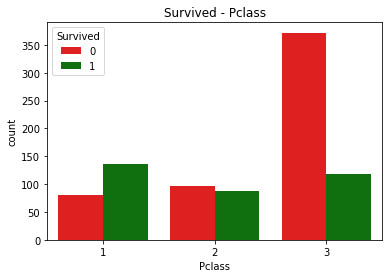

In [29]:
drawCountPlot("Pclass")

* Birinci sınıfta seyahat eden yolcuların hayatta kalma oranı diğer sınıflarda seyahat eden yolculara oranla daha yüksektir.
* Hayatta kalma oranları ikinci sınıfta çok az farkla hayatta kalma aleyhineyken bu oran üçüncü sınıfta çok daha fazladır.

### Survived - Sex

Survived
Sex    Survived          
female 0         0.257962
       1         0.742038
male   0         0.811092
       1         0.188908

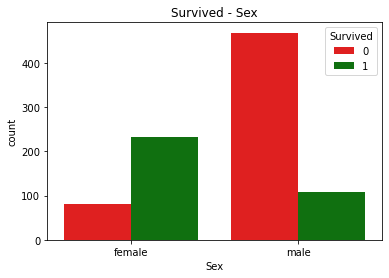

In [30]:
drawCountPlot("Sex")

* Cinsiyetin hayatta kalma oranına etkisi yüksektir.
* Erkekler yüksek oranda yaşamını yitirmişken, kadınlar yüksek oranda hayatta kalmıştır.

### Survived - Age

In [31]:
ranges = [0, 16, 32, 48, 64, np.inf]
group_names = ["0-16", "16-32", "32-48", "48-64", "64+"]
train_df["AgeRange"] = pd.cut(train_df["Age"], bins = ranges, labels = group_names)

Survived
AgeRange Survived          
0-16     0         0.486726
         1         0.513274
16-32    0         0.647321
         1         0.352679
32-48    0         0.618474
         1         0.381526
48-64    0         0.571429
         1         0.428571
64+      0         0.909091
         1         0.090909

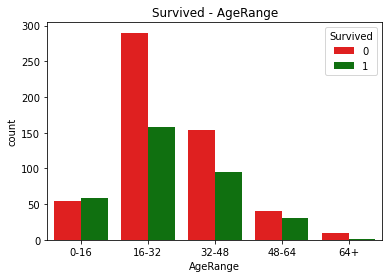

In [32]:
drawCountPlot("AgeRange")

* Kazadan kurtulma oranı en yüksek **0-16** yaş grubunda bulunuyor. Öyle ki bu yaş grubunda hayatta kalma oranı ölüm oranından daha yüksek.
* **16-32** yaş aralığından **48-64** aralığına gidildikçe hayatta kalma oranı artıyor ancak hala ölüm oranından daha düşük.
* Hayatta kalma oranının en düşük olduğu aralık ise %9 ile **64+** üstü yaş grubu.

In [33]:
train_df.sort_values("Age", ascending = False).head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,isAlone,FamSize,AgeRange
630,1,1,male,80.0,0,0,30.0000,Not Missing,S,Mr,True,1,64+
851,0,3,male,74.0,0,0,7.7750,Missing,S,Mr,True,1,64+
493,0,1,male,71.0,0,0,49.5042,Missing,C,Mr,True,1,64+
96,0,1,male,71.0,0,0,34.6542,Not Missing,C,Mr,True,1,64+
116,0,3,male,70.5,0,0,7.7500,Missing,Q,Mr,True,1,64+
745,0,1,male,70.0,1,1,71.0000,Not Missing,S,Gentleman,False,3,64+
672,0,2,male,70.0,0,0,10.5000,Missing,S,Mr,True,1,64+
33,0,2,male,66.0,0,0,10.5000,Missing,S,Mr,True,1,64+
54,0,1,male,65.0,0,1,61.9792,Not Missing,C,Mr,False,2,64+
280,0,3,male,65.0,0,0,7.7500,Missing,Q,Mr,True,1,64+


* Gemideki **en yaşlı 10 kişi**den yalnızca en yaşlıları olan **80** yaşındaki adam hayatta kalmıştır.
* En yaşlı 10 kişinin de cinsiyeti **erkek**tir.
* Bu 10 kişinin yarısı **birinci sınıf** yolculuk yapmıştır.
* Kişilerin 8'i yalnız yolculuk yaparken sadece 2 tanesi ailesi ile yolculuk yapmıştır.

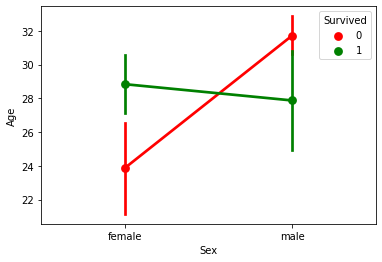

In [34]:
sns.pointplot(x = "Sex", y = "Age", hue = "Survived", data = train_df, palette = {0: "red", 1:"green"})
plt.show()

* Kadınlarda hayatta kalanların yaş ortalaması hayatını kaybedenlere göre daha yüksek.
* Erkeklerde hayatta kalanların yaş ortalaması hayatını kaybedenlere göre daha düşük.

### Survived - FamSize

Survived
FamSize Survived          
1       0         0.696462
        1         0.303538
2       0         0.447205
        1         0.552795
3       0         0.421569
        1         0.578431
4       0         0.275862
        1         0.724138
5       0         0.800000
        1         0.200000
6       0         0.863636
        1         0.136364
7       0         0.666667
        1         0.333333
8       0         1.000000
11      0         1.000000

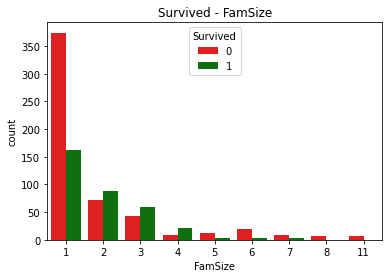

In [35]:
drawCountPlot("FamSize")

* Yalnız seyahat eden ve geniş aileye (FamSize >= 5) sahip olan yolcuların hayatta kalma olasılığı çekirdek aileye (1 < FamSize < 5) sahip olan yolcuların hayatta kalma olasılığından daha azdır.

### Survived - Cabin

Survived
Cabin       Survived          
Missing     0         0.700146
            1         0.299854
Not Missing 0         0.333333
            1         0.666667

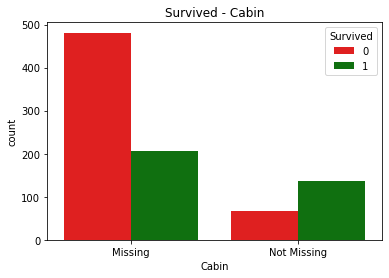

In [36]:
drawCountPlot("Cabin")

* Hangi kabinde seyahat ettiği bilinen yolcuların hayatta kalma oranı bilinmeyen yolculara göre çok daha yüksek. Bunun nedeni aşağıda görüldüğü gibi kabini bilinen yolcuların yüksek oranda birinci sınıfta seyahat ettiğindendir.

In [37]:
train_df[train_df["Cabin"] == "Not Missing"]["Pclass"].value_counts()

1    176
2     16
3     12
Name: Pclass, dtype: int64

In [38]:
train_df[train_df["Cabin"] == "Missing"]["Pclass"].value_counts()

3    479
2    168
1     40
Name: Pclass, dtype: int64

### Survived - Embarked

Survived
Embarked Survived          
C        0         0.441176
         1         0.558824
Q        0         0.610390
         1         0.389610
S        0         0.663043
         1         0.336957

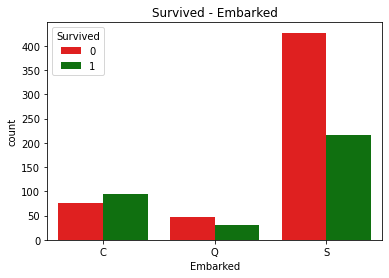

In [39]:
drawCountPlot("Embarked")

* Gemiye binilen limana göre de hayatta kalıp kalmama değişkenlik göstermektedir.
* Bunun nedeni örneğin C limanının bulunduğu yerin daha lüks bir semt olmasından dolayı 1. sınıfta seyahat eden yolcu sayısının S limanına göre daha fazla olması olabilir.

In [40]:
train_df[train_df["Embarked"] == "C"]["Pclass"].value_counts(normalize = True)

1    0.511765
3    0.388235
2    0.100000
Name: Pclass, dtype: float64

In [41]:
train_df[train_df["Embarked"] == "S"]["Pclass"].value_counts(normalize = True)

3    0.548137
2    0.254658
1    0.197205
Name: Pclass, dtype: float64

* Yukarıdaki bilgilere göre farklı limanlara binen insanların seyahat ettikleri sınıflar arasında aslında pek bir fark yok. Bu açıdan gemiye binen yolcuların sınıflara eşit dağıldığını söyleyebiliriz.

### Survived - Title

Survived
Title      Survived          
Gentleman  0         0.714286
           1         0.285714
Master     0         0.425000
           1         0.575000
Miss       0         0.302198
           1         0.697802
Mr         0         0.843327
           1         0.156673
Mrs        0         0.208000
           1         0.792000
Noblewoman 1         1.000000

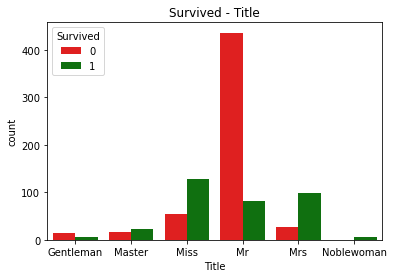

In [42]:
drawCountPlot("Title")

* Kişilerin ünvanlarına göre veriyi incelediğimizde hayatta kalan kısmı çoğunlukla kadınlar (**Mrs**, **Miss**, **Noblewoman**) ve çocukların (**Master**) oluşturduğunu görebiliriz. Bu durumda erkeklerin (**Gentleman**) kadınlara ve çocuklara öncelik verdiğini anlayabiliriz.

### Survived - isAlone

Survived
isAlone Survived          
False   0         0.494350
        1         0.505650
True    0         0.696462
        1         0.303538

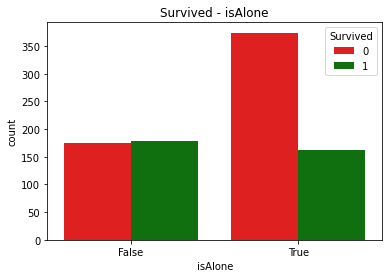

In [43]:
drawCountPlot("isAlone")

* Yakınlarıyla seyahat eden kişilerin hayatta kalma oranı hayatını kaybetme oranıyla hemen hemen eşittir.
* Buna karşılık yalnız seyahat eden bir bireyin hayatta kalma oranı oldukça düşük olarak %30 civarlarındadır.

### FamSize & Pclass vs. Fare

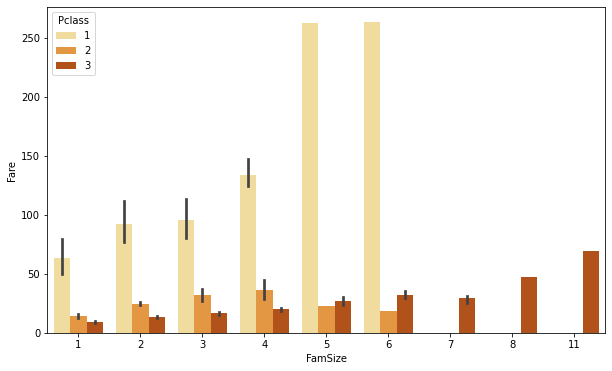

In [44]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.barplot(y = "Fare", x = "FamSize", hue = "Pclass", data = train_df, palette = "YlOrBr")
plt.show()


* Aile boyutu arttıkça her sınıfta yolculuk eden yolcuların ödedikleri miktar artıyor. 
* Bunun nedeni ödemenin toplu yapılmasıdır.
* Ücretin artmasındaki temel neden ise yolculuk eden sınıfın değişmesi.

### Pclass - Fare

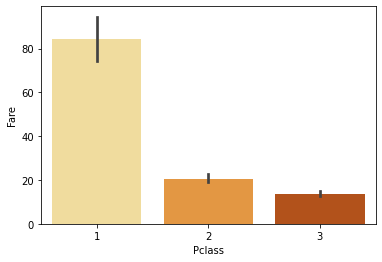

In [45]:
sns.barplot(x = "Pclass", y = "Fare", data = train_df, palette = "YlOrBr")
plt.show()

* Birinci sınıfta seyahat edenlerin ödedikleri ücret 80'den fazla iken ikinci sınıfta seyahat edenler bu değerin yaklaşık çeyreği kadar ücret ödemektedirler. Üçüncü sınıftakiler ise bu değerden daha az ödemektedir.

### Fare

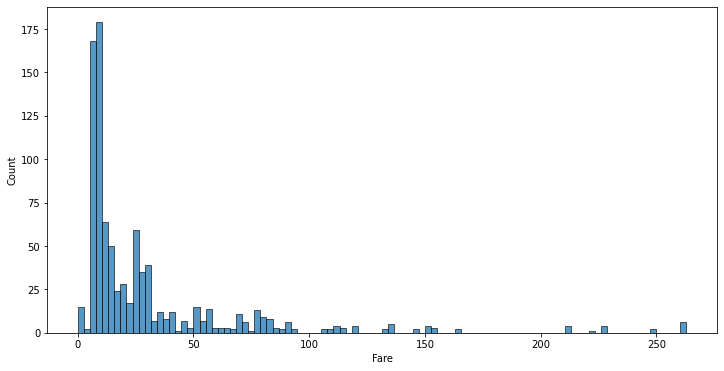

In [46]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.histplot(train_df.query("Fare < 300")["Fare"], ax = ax, bins = 100)
plt.show()

In [47]:
train_df.sort_values("Fare", ascending = False).head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,isAlone,FamSize,AgeRange
258,1,1,female,35.0,0,0,512.3292,Missing,C,Miss,True,1,32-48
737,1,1,male,35.0,0,0,512.3292,Not Missing,C,Mr,True,1,32-48
679,1,1,male,36.0,0,1,512.3292,Not Missing,C,Mr,False,2,32-48
88,1,1,female,23.0,3,2,263.0000,Not Missing,S,Miss,False,6,16-32
27,0,1,male,19.0,3,2,263.0000,Not Missing,S,Mr,False,6,16-32
341,1,1,female,24.0,3,2,263.0000,Not Missing,S,Miss,False,6,16-32
438,0,1,male,64.0,1,4,263.0000,Not Missing,S,Mr,False,6,48-64
311,1,1,female,18.0,2,2,262.3750,Not Missing,C,Miss,False,5,16-32
742,1,1,female,21.0,2,2,262.3750,Not Missing,C,Miss,False,5,16-32
118,0,1,male,24.0,0,1,247.5208,Not Missing,C,Mr,False,2,16-32


* En fazla ücret ödeyen 10 kişinin 10'u da birinci sınıf yolculuk yapmıştır.
* Bu kişilerin 7'si hayatta kalırken 3'ü hayatlarını kaybetmiştir.
* Hayatını kaybedenlerin hepsi erkek olurken tüm kadınlar (5) hayatta kalmıştır.

* En fazla ücret ödeyenlerin ödedikleri ücret ve aile boyutlarının durumları neticesinde **512.3292** birim ücret ödeyen kişilerin veri setinden atılması söz konusu olabilirdi ancak test setinde de bu birimi ödeyen bir kişi olduğu için atılmamasına karar verdim.

### Pclass vs. Survived - Fare

In [48]:
train_df[train_df["Pclass"].isin([2, 3])].groupby("Pclass")[["Survived", "Fare"]].mean()[1:]

,Survived,Fare
Pclass,,
2,0.472826,20.662183
3,0.242363,13.675550


* Üçüncü sınıfta seyahat edenler ödedikleri ücretin yaklaşık 1.5 kat fazlasını ödeyerek hayatta kalma şanslarını 2 katına çıkarabilirlerdi...

### Age vs. Fare (vs. Survived - FamSize)

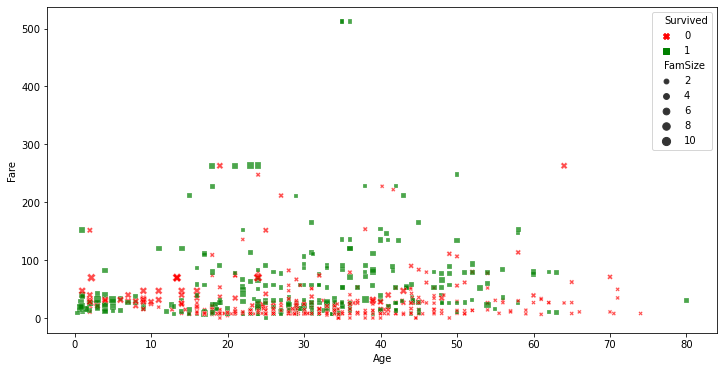

In [49]:
fig, ax = plt.subplots(figsize = (12, 6))
markers = {0: "X", 1: "s"}
palette = {0: "red", 1: "green"}
sns.scatterplot(x = "Age", y = "Fare", 
                data = train_df, 
                hue = "Survived", 
                palette = palette, 
                style = "Survived", 
                markers = markers,
                size = "FamSize",
                alpha = 0.7)
plt.show()

* Yaş ile ödenen ücret arasında tam olarak doğrusal bir ilişki söz konusu değil. Çünkü aileler ücretleri ortak ödüyor ve ailelerde her yaştan insan olabiliyor.

### Sex vs. Age

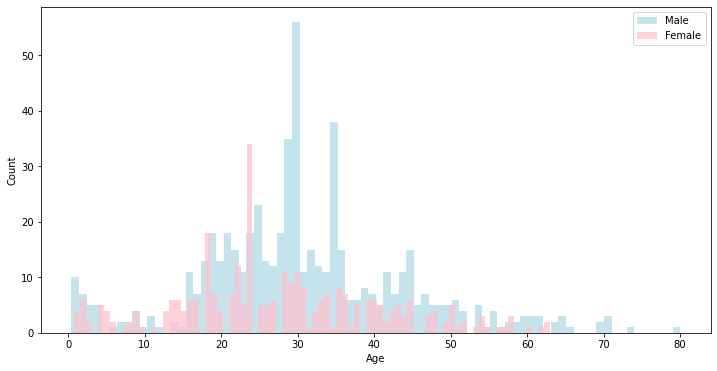

In [50]:
fig, ax = plt.subplots(figsize = (12, 6))
plt.hist(train_df.query("Sex == 'male'")["Age"], bins = 80, alpha = 0.7, color = "lightblue")
plt.hist(train_df.query("Sex == 'female'")["Age"], bins = 80, alpha = 0.7, color = "pink")
plt.legend(["Male", "Female"])
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

* Gemideki yolcuların çoğunluğunun yaşı 17 ile 37 arasındadır.

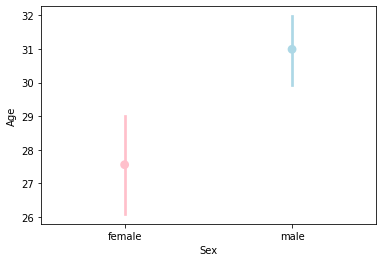

In [51]:
sns.pointplot(x = "Sex", y = "Age", data = train_df, palette = {"female":"pink", "male":"lightblue"})
plt.show()


* Kadınların yaş ortalaması erkeklere göre daha düşüktür.

# Model the data
* Elimdeki veride **hedef değişken** (Survived) ve **tahmin değişkenleri** bir arada bulunuyor. Bu yüzden önce tahmin değişkeni veriden ayrılmalıdır.
* Eğiteceğim modelde zaten **Age** değişkenini kullanacağım için **AgeRange** değişkenini bu aşamaya dahil etmiyorum.

In [52]:
X = train_df.drop(["Survived", "AgeRange"], axis = 1)
y = train_df["Survived"]
X_holdout = test_df.drop(["PassengerId"], axis = 1)

* Sklearn'deki algoritmalarda modeller eğitebilmek için verimin **eksiksiz** ve **nümerik** olarak bulunması gerekiyor.
* Verimi zaten temizlediğim için içinde eksik değer bulunmuyor ancak kategorik değişkenlerim mevcut.
* Bu kategorik değişkenleri nümerik olarak ifade edebilmek için **dummy variable**lara dönüştüreceğim.
* Daha sonra uğraşmamak için üzerinde tahmin yapacağım veri setinin kategorik değişkenlerini de burada dummy variablelara dönüştürüyorum.

In [53]:
X = pd.get_dummies(X, drop_first = True)
X_holdout = pd.get_dummies(X_holdout, drop_first = True)
X.shape, y.shape, X_holdout.shape

((891, 17), (891,), (418, 17))

* Veri setindeki özellikle nümerik değişkenlerde aralıklar birbirlerinden farklı olduğu için her değişkenin modele eşit şartlarda katkı vermesi adına veriyi ölçeklendiriyorum.

In [54]:
X = scale(X)
X_holdout = scale(X_holdout)

* Artık modelim eğitilmeye hazır.

### 1. kNN
* kNN algoritması, "k" sayıda etiketli en yakın veri noktalarına bakarak çoğunluk oyuna göre etiketi tahmin eden bir classifier'dır.

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15, stratify = y)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
round(knn.score(X_test, y_test), 2)

0.84

* Yukarıdaki sonuçtan daha güvenilir bir sonuç elde etmek için biraz daha maliyetli olan **cross validation** işlemini uygulayabiliriz.

In [56]:
cv_results = cross_val_score(knn, X, y, cv = 10)
round(np.mean(cv_results), 2)

0.82

### 2. Logistic Regression
* Etiketlerin meydana gelme olasılığını tahmin eder. Eğer p olasılığı 0.5'den büyükse 1 olarak, küçükse 0 olarak etiketlenmiştir.

In [57]:
logreg = LogisticRegression(random_state = 15)
logreg.fit(X_train, y_train)
round(logreg.score(X_test, y_test), 2)

0.87

In [58]:
cv_results = cross_val_score(logreg, X, y, cv = 10)
round(np.mean(cv_results), 3)

0.832

### 3. SVC
* SVM, eğitim verilerindeki herhangi bir noktadan en uzak olan iki sınıf arasında bir karar sınırı bulan vektör uzayıdır.

In [59]:
svc = SVC()
svc.fit(X_train, y_train)
round(svc.score(X_test, y_test), 2)

0.85

In [60]:
cv_results = cross_val_score(svc, X, y, cv = 10)
round(np.mean(cv_results), 3)

0.833

### 4. Decision Tree
* Etiketli bir veri setinden etiketleri tahmin etmek için her bir feature hakkında bir dizi if-else soruları öğrenen model.

In [61]:
dt = DecisionTreeClassifier(random_state = 15)
dt.fit(X_train, y_train)
round(dt.score(X_test, y_test), 2)

0.81

In [62]:
cv_results = cross_val_score(dt, X, y, cv = 10)
round(np.mean(cv_results), 2)

0.79

* **SVM**: 0.77511
* **KNN**: 0.74641
* **DT**: 0.67464
* **Logreg**: 0.76794

## Model evaulation
* Şu ana kadar eğittiğim modellerden en yüksek **accuracy** değerini **SVM** algoritmasıyla yakaladığım için **GridSearchCV** işlemini bu algoritma üzerinden yapacağım.

In [63]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
svc_cv = GridSearchCV(svc, param_grid, cv = 10)

In [64]:
svc_cv.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']})

In [65]:
svc_cv.best_estimator_

SVC(C=100, gamma=0.001)

In [66]:
y_pred = svc_cv.predict(X_holdout)

In [67]:
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": y_pred
})

In [68]:
submission.to_csv('submission.csv', index=False)

In [69]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


**SVM GridSearchCV** : 0.77751

* **Ensemble methods kullanılarak geliştirilmeye devam edilecek!**